In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

##Import any other packages you may need here
from itertools import chain
import sklearn.metrics
import tensorflow as tf

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [5]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('/data','images*', '*', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')
sample_df.sample(3)

Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
2115,00010850_001.png,Effusion,1,10850,059Y,F,PA,2602,2991,0.143,0.143
3202,00015732_038.png,Infiltration,38,15732,048Y,F,AP,2500,2048,0.168,0.168
2223,00011436_004.png,Pleural_Thickening,4,11436,054Y,M,PA,2992,2991,0.143,0.143


In [6]:
## EDA
# Todo 
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
110565,00030120_000.png,Infiltration,0,30120,41,F,PA,2021,2021,0.194311,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
66588,00016472_008.png,No Finding,8,16472,58,M,AP,2500,2048,0.168000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25320,00006664_002.png,Atelectasis,2,6664,52,M,AP,2500,2048,0.171000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
all_xray_df['Pneumonia'].value_counts()

0.0    110689
1.0      1431
Name: Pneumonia, dtype: int64

[Text(0, 0.5, 'Number of Images with Label')]

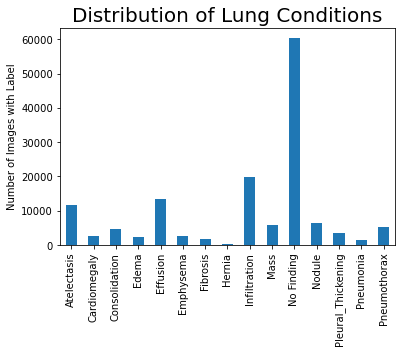

In [8]:
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
ax = all_xray_df[all_labels].sum().plot(kind='bar')
plt.title("Distribution of Lung Conditions", size = 20)
ax.set(ylabel = 'Number of Images with Label')

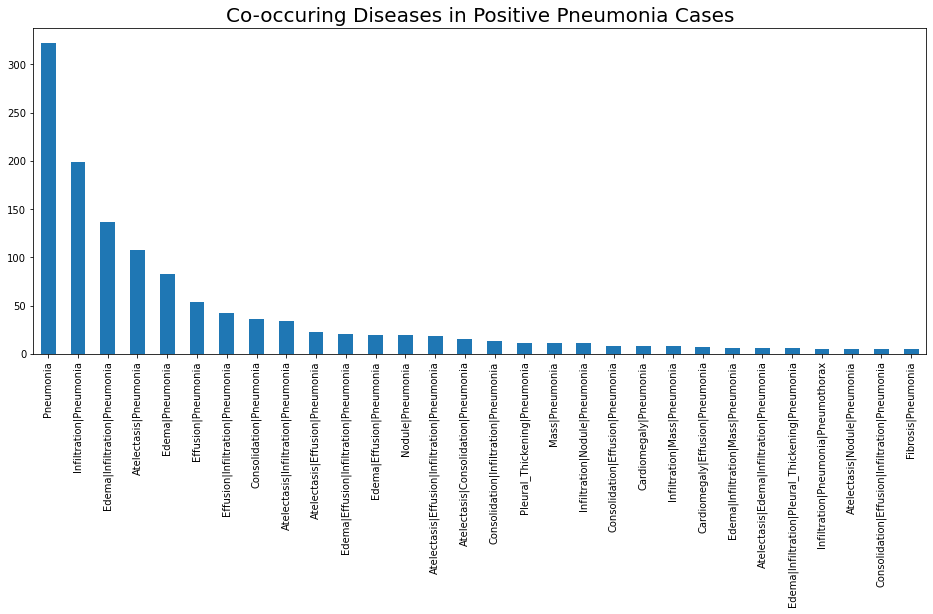

In [9]:
plt.figure(figsize=(16,6))
plt.title("Co-occuring Diseases in Positive Pneumonia Cases", size = 20)
all_xray_df[all_xray_df.Pneumonia==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

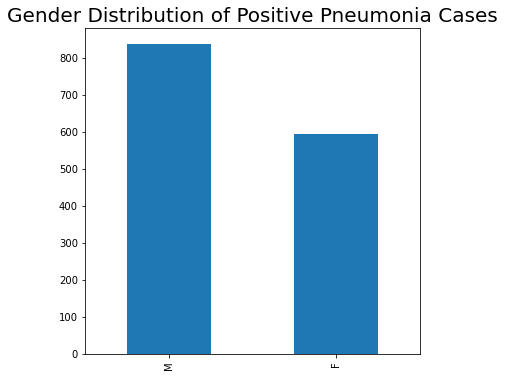

In [10]:
plt.figure(figsize=(6,6))
plt.title("Gender Distribution of Positive Pneumonia Cases", size = 20)
all_xray_df[all_xray_df.Pneumonia == 1]['Patient Gender'].value_counts().plot(kind='bar')

(array([4.1465e+04, 7.0265e+04, 3.7400e+02, 1.0000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00]),
 array([  1. ,  42.3,  83.6, 124.9, 166.2, 207.5, 248.8, 290.1, 331.4,
        372.7, 414. ]),
 <a list of 10 Patch objects>)

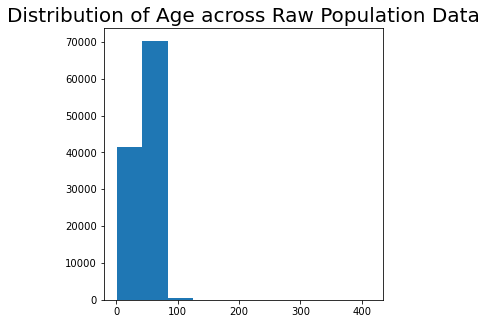

In [11]:
plt.figure(figsize=(5,5))
plt.title("Distribution of Age across Raw Population Data", size=20)
plt.hist(all_xray_df['Patient Age'])

In [12]:
print("Highest age in population data: {}".format(max(all_xray_df['Patient Age'])))

Highest age in population data: 414


In [13]:
all_xray_df['Patient Age'].describe()

count    112120.000000
mean         46.901463
std          16.839923
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max         414.000000
Name: Patient Age, dtype: float64

In [14]:
all_xray_df.drop(all_xray_df[all_xray_df['Patient Age'] > 120].index, inplace=True) # Dropping outliers from dataset

(array([ 1803.,  5021., 12798., 14580., 18664., 26481., 20790.,  9793.,
         1917.,   257.]),
 array([ 1. , 10.4, 19.8, 29.2, 38.6, 48. , 57.4, 66.8, 76.2, 85.6, 95. ]),
 <a list of 10 Patch objects>)

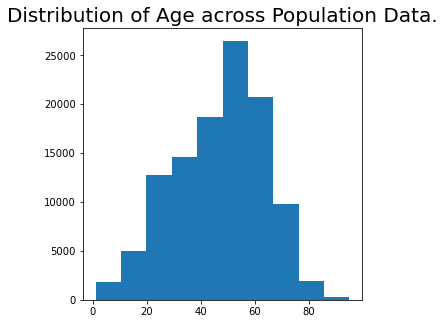

In [15]:
plt.figure(figsize=(5,5))
plt.title("Distribution of Age across Population Data.", size = 20)
plt.hist(all_xray_df['Patient Age'])

In [16]:
all_xray_df['Patient Age'].describe()

count    112104.000000
mean         46.872574
std          16.598152
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max          95.000000
Name: Patient Age, dtype: float64

(array([ 41.,  85., 174., 203., 196., 243., 266., 175.,  39.,   8.]),
 array([ 2. , 10.8, 19.6, 28.4, 37.2, 46. , 54.8, 63.6, 72.4, 81.2, 90. ]),
 <a list of 10 Patch objects>)

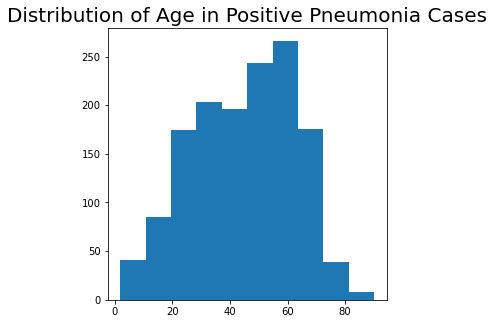

In [17]:
plt.figure(figsize=(5,5))
plt.title("Distribution of Age in Positive Pneumonia Cases", size = 20)
plt.hist(all_xray_df['Patient Age'][all_xray_df['Pneumonia'] == 1])

In [18]:
all_xray_df['Patient Age'][all_xray_df['Pneumonia'] == 1].describe()

count    1430.000000
mean       44.670629
std        17.639098
min         2.000000
25%        31.000000
50%        46.000000
75%        59.000000
max        90.000000
Name: Patient Age, dtype: float64

(array([ 1762.,  4936., 12608., 14366., 18454., 26188., 20532.,  9678.,
         1895.,   255.]),
 array([ 1. , 10.4, 19.8, 29.2, 38.6, 48. , 57.4, 66.8, 76.2, 85.6, 95. ]),
 <a list of 10 Patch objects>)

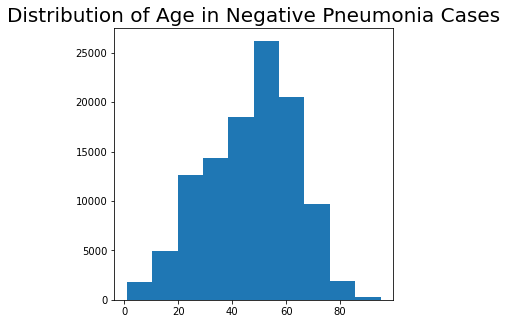

In [19]:
plt.figure(figsize=(5,5))
plt.title("Distribution of Age in Negative Pneumonia Cases", size = 20)
plt.hist(all_xray_df['Patient Age'][all_xray_df['Pneumonia'] == 0])

In [20]:
all_xray_df['Patient Age'][all_xray_df['Pneumonia'] == 0].describe()

count    110674.000000
mean         46.901025
std          16.582446
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max          95.000000
Name: Patient Age, dtype: float64

In [21]:
all_xray_df['View Position'].unique()

array(['PA', 'AP'], dtype=object)

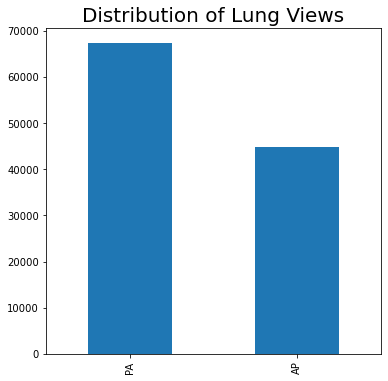

In [22]:
plt.figure(figsize=(6,6))
plt.title("Distribution of Lung Views", size = 20)
all_xray_df['View Position'].value_counts().plot(kind='bar')

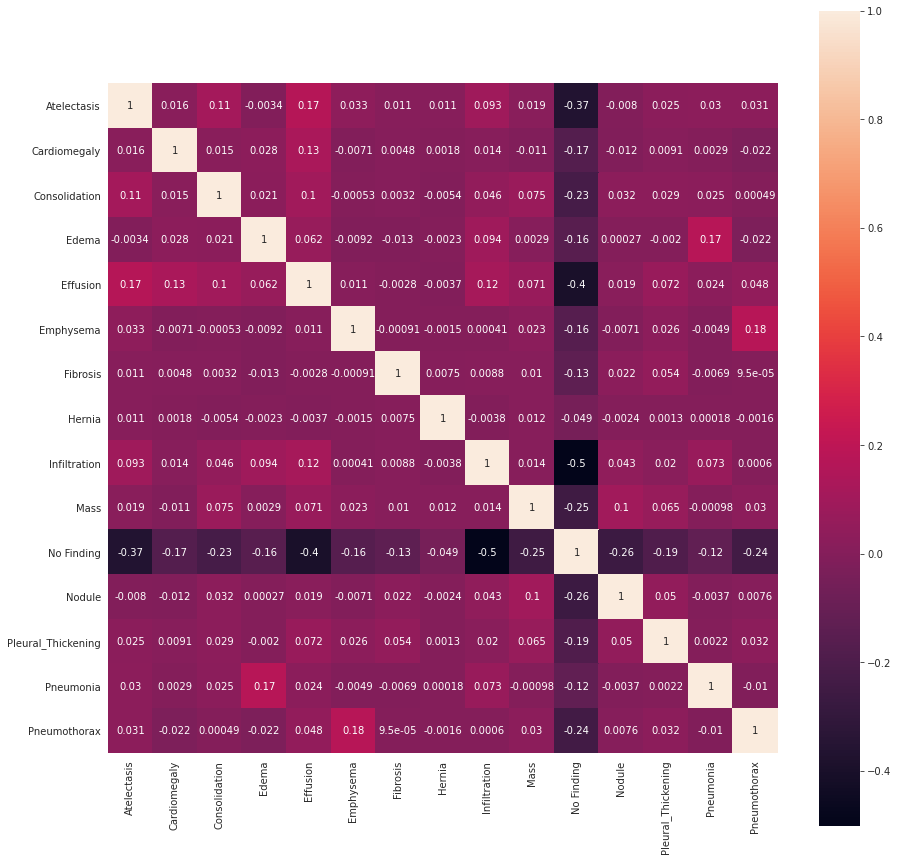

In [23]:
heat_df = all_xray_df.copy()
heat_df.drop(['Image Index', 'Finding Labels', 'Follow-up #','Patient ID', 'Patient Age',
              'Patient Gender', 'View Position', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 
             'y]',  'Unnamed: 11', 'path'], axis=1, inplace=True)

heat = heat_df.corr() # correlation between the different parameters
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(heat, annot=True, square=True)


# Exploratory Data Analysis of 2D Imaging 

In [40]:
import pydicom
dcm1 = pydicom.dcmread('test1.dcm')
dcm2 = pydicom.dcmread('test2.dcm')
dcm3 = pydicom.dcmread('test3.dcm')
dcm4 = pydicom.dcmread('test4.dcm')
dcm5 = pydicom.dcmread('test5.dcm')
dcm6 = pydicom.dcmread('test6.dcm')

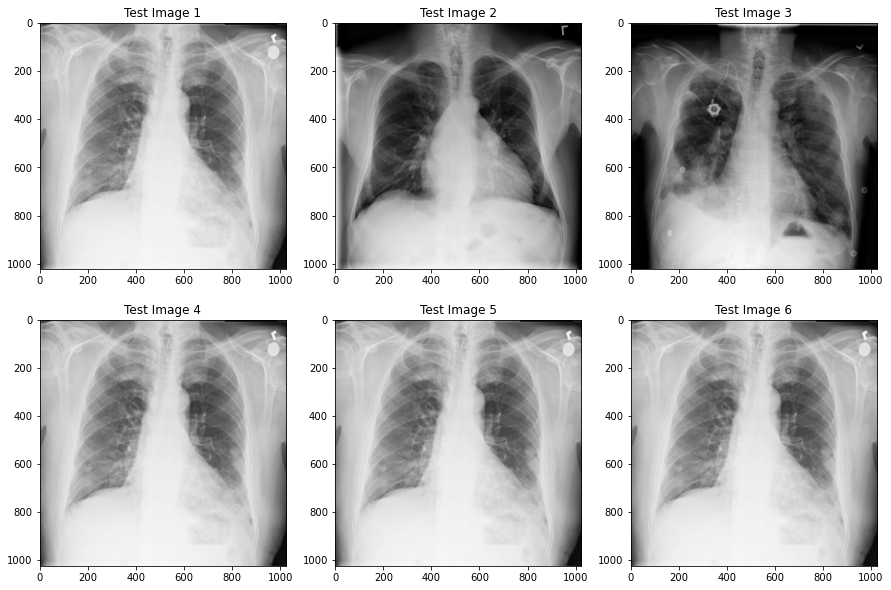

In [41]:
import matplotlib.pyplot as plt
import numpy as np
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 3, figsize=(15, 10))
  
# For Sine Function
axis[0, 0].imshow(dcm1.pixel_array,cmap='gray')
axis[0, 0].set_title("Test Image 1")
  
# For Cosine Function
axis[0, 1].imshow(dcm2.pixel_array,cmap='gray')
axis[0, 1].set_title("Test Image 2")
  
# For Tangent Function
axis[0, 2].imshow(dcm3.pixel_array,cmap='gray')
axis[0, 2].set_title("Test Image 3")
  
# For Tanh Function
axis[1, 0].imshow(dcm4.pixel_array,cmap='gray')
axis[1, 0].set_title("Test Image 4")

axis[1, 1].imshow(dcm5.pixel_array,cmap='gray')
axis[1, 1].set_title("Test Image 5")
  
# For Tanh Function
axis[1, 2].imshow(dcm6.pixel_array,cmap='gray')
axis[1, 2].set_title("Test Image 6")
  
# Combine all the operations and display
plt.show()

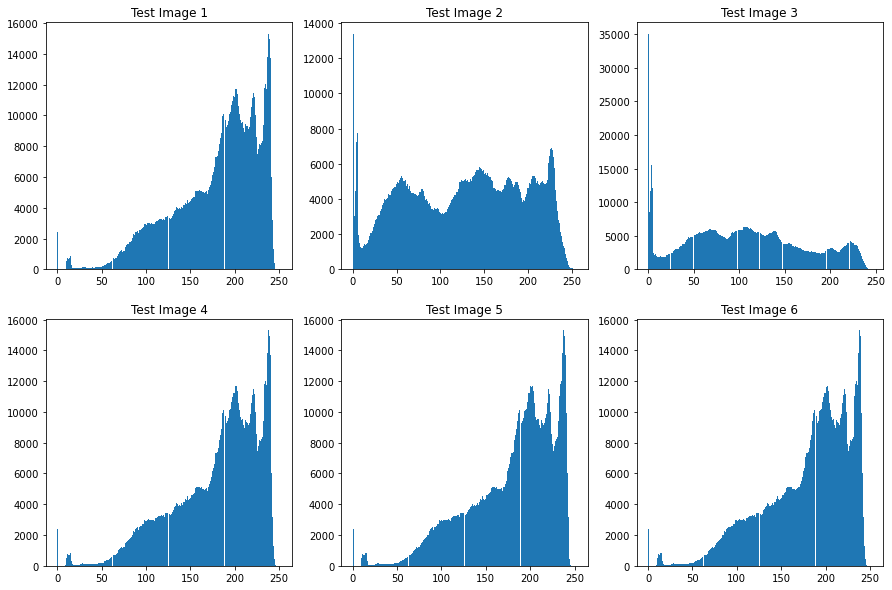

In [42]:
import matplotlib.pyplot as plt
import numpy as np
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 3, figsize=(15, 10))
  
# For Sine Function
axis[0, 0].hist(dcm1.pixel_array.ravel(), bins = 256)
axis[0, 0].set_title("Test Image 1")
  
# For Cosine Function
axis[0, 1].hist(dcm2.pixel_array.ravel(), bins = 256)
axis[0, 1].set_title("Test Image 2")
  
# For Tangent Function
axis[0, 2].hist(dcm3.pixel_array.ravel(), bins = 256)
axis[0, 2].set_title("Test Image 3")
  
# For Tanh Function
axis[1, 0].hist(dcm4.pixel_array.ravel(), bins = 256)
axis[1, 0].set_title("Test Image 4")

axis[1, 1].hist(dcm5.pixel_array.ravel(), bins = 256)
axis[1, 1].set_title("Test Image 5")
  
# For Tanh Function
axis[1, 2].hist(dcm6.pixel_array.ravel(), bins = 256)
axis[1, 2].set_title("Test Image 6")
  
# Combine all the operations and display
plt.show()

# Model Inference

In [24]:
def load_model(model_path, weight_path):
    # todo
    with open(model_path, 'r') as json_file:
        saved_model = json_file.read()
        
    model = tf.keras.models.model_from_json(saved_model)
    model.summary()
    
    model.load_weights(weight_path)
    
    return model

In [25]:
model_path = 'final_model.json' #path to saved model
weight_path = 'xray_class_model.best.hdf5' #path to saved best weights
model = load_model(model_path, weight_path) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [ ]:
predictions = []
for i in range(1,6):
    pred_Y = model.predict(, batch_size = 100, verbose = True)
    predictions.append(pred_y)